# Distribution of digits in the decimal representation of the square root of primes

## 0. modules

In [1]:
from decimal import *
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import *

## 1. functions

In [3]:
def clip(dec, first, last):
#     getcontext().prec = last
    
    if last - first <= 0:
        print("Argument Error: {} is greater than {}.".format(first, last))
    else:
        int_length = len(str(int(dec)))
        mstr = format(dec, '.{}f'.format(last-int_length)).replace('.','')
    
    return mstr[first:]

In [25]:
def get_digits_hist(mstr):
    return {str(c): mstr.count(str(c)) for c in range(10)}

## 2. distribution of the square root of a single prime

In [18]:
num = 2
odr = 5

getcontext().prec = 10**odr
dec = Decimal(num).sqrt()

odrs = [10**k for k in range(odr + 1)]

100%|██████████| 5/5 [00:00<00:00, 30.07it/s]


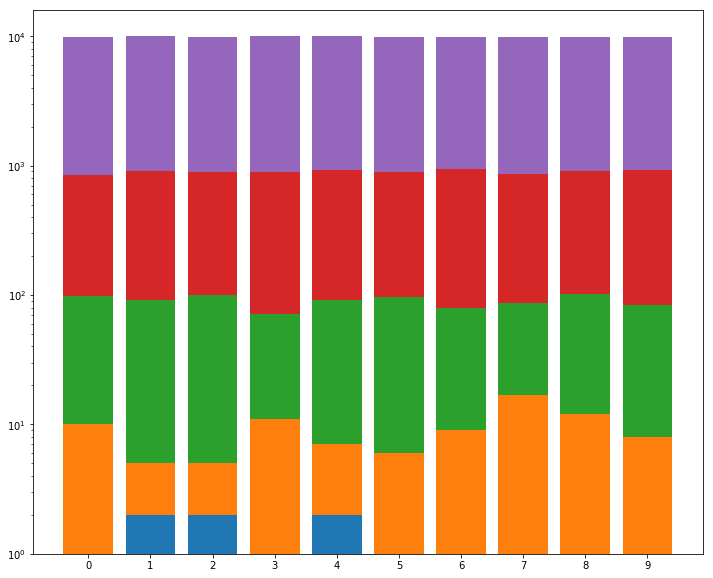

In [20]:
plt.figure(figsize=(12,10))

Y_matrix = [[0 for k in range(10)]]
for i in tqdm(range(odr)):
    mstr = clip(dec, odrs[i], odrs[i+1])
    hist_dic = get_digits_hist(mstr)
#     print(hist_dic, list(hist_dic.values()))
    Y_matrix.append(list(hist_dic.values()))
    plt.bar(range(10), Y_matrix[-1], bottom = Y_matrix[-2])
    plt.xticks(range(10), hist_dic.keys())
    plt.yscale('log')
    
plt.show()

## 3. distribution of multiple square roots

In [6]:
odr = 4
getcontext().prec = 10**odr
odrs = [10**k for k in range(odr + 1)]

100%|██████████| 9/9 [00:01<00:00,  6.90it/s]


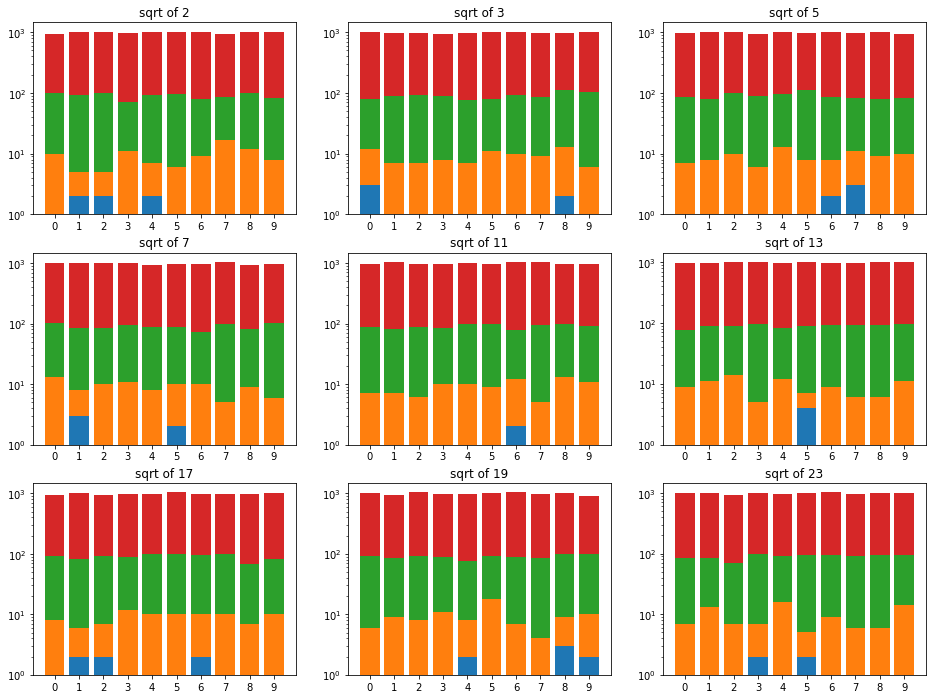

In [7]:
plt.figure(figsize=(16,12))

nums = [2, 3, 5, 7, 11, 13, 17, 19, 23]
# nums = [int(n) for n in sorted(np.random.randint(2,100,9))]
for k in tqdm(range(len(nums))):
    dec = Decimal(nums[k]).sqrt()
    
    plt.subplot(331+k)
    plt.title('sqrt of {}'.format(nums[k]))

    Y_matrix = [[0 for k in range(10)]]
    for i in range(odr):
        mstr = clip(dec, odrs[i], odrs[i+1])
        hist_dic = get_digits_hist(mstr)
        Y_matrix.append(list(hist_dic.values()))
        plt.bar(range(10), Y_matrix[-1], bottom = Y_matrix[-2])
        plt.xticks(range(10), hist_dic.keys())
        plt.yscale('log')
    
plt.show()